# Project Ensamble Technique

# Deliverable 1: Exploratory data quality report 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [90]:
termDepData = pd.read_csv('bank-full.csv')

In [91]:
termDepData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


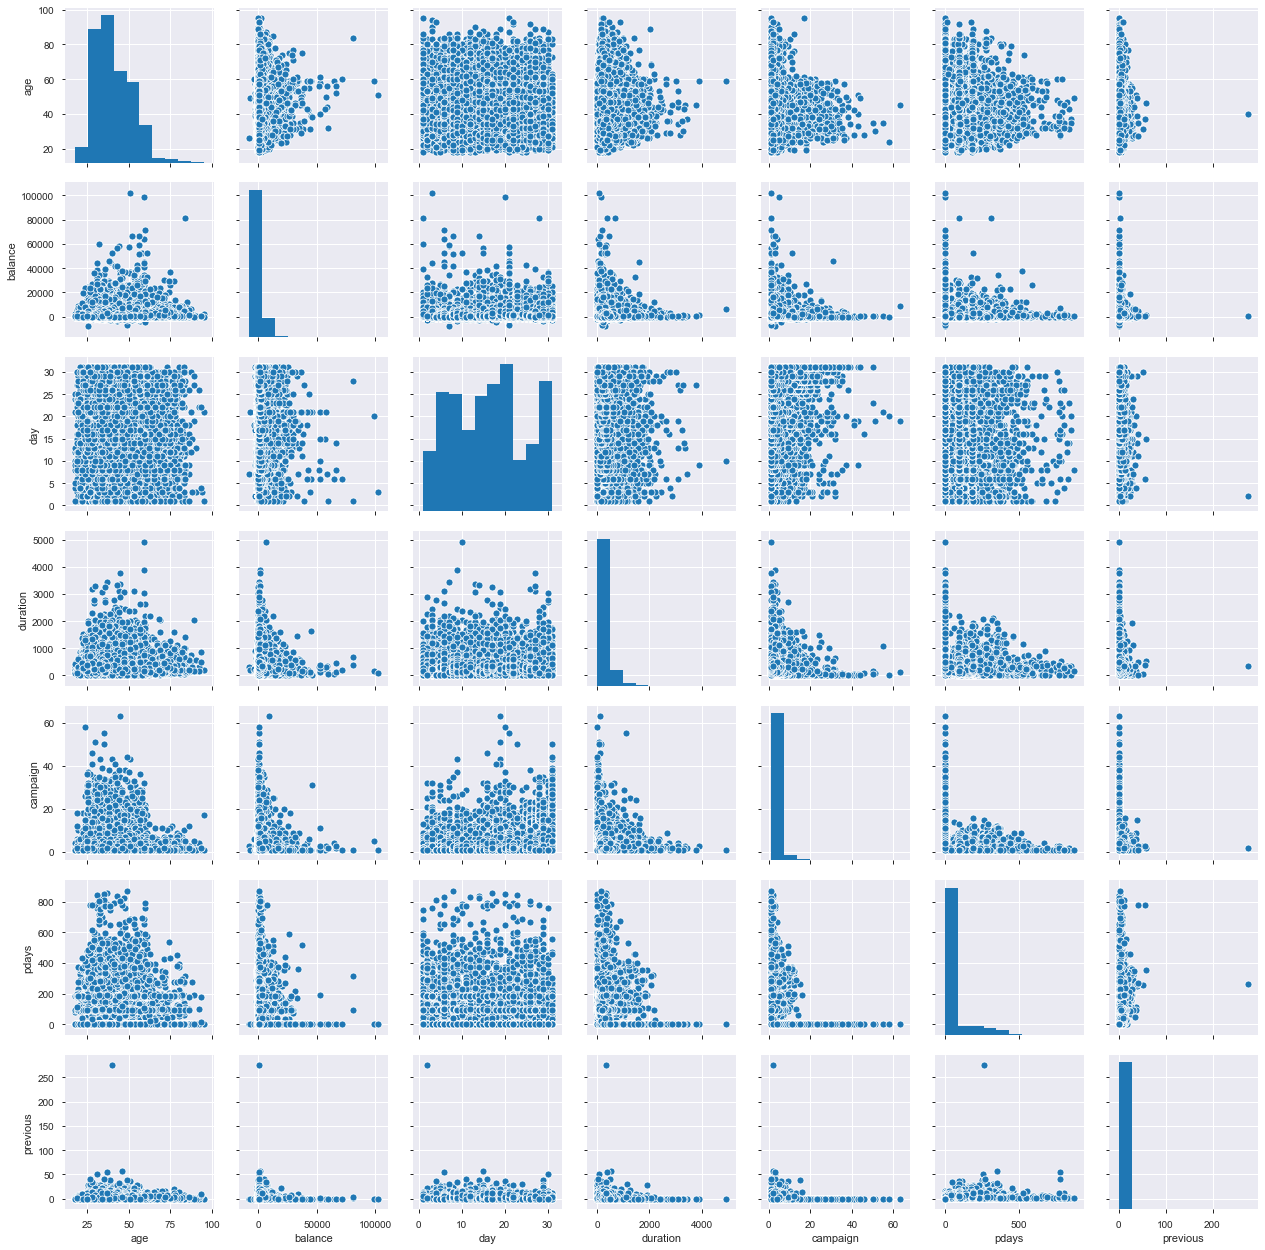

In [92]:
sns.pairplot(termDepData)

In [93]:
from pandas_profiling import ProfileReport


In [94]:
#Using Pandas_profiling to do the univariate and Bivariate analysis.
profile = ProfileReport(termDepData, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile 

In [95]:
#Get info of the columns in the dataframe.
termDepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [96]:
termDepData.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

# Deliverable 2 : Prepare Data for Analytics:

In [97]:
for feature in termDepData.columns: # Loop through all columns in the dataframe
    if termDepData[feature].dtype == 'object': # Only apply for columns with categorical strings
        termDepData[feature] = pd.Categorical(termDepData[feature])# Replace strings with an integer
termDepData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [98]:
termDepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [99]:

print(termDepData.job.value_counts())
print(termDepData.marital.value_counts())
print(termDepData.education.value_counts())
print(termDepData.default.value_counts())

print(termDepData.housing.value_counts())
print(termDepData.loan.value_counts())
print(termDepData.contact.value_counts())

print(termDepData.month.value_counts())

print(termDepData.poutcome.value_counts())
print(termDepData.Target.value_counts())

print((termDepData['duration'] == 0).count())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [100]:
replaceStruct = {
                 "marital":     {"married": 1, "single": 2 ,"divorced": 3},
                 "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
                 "housing": {"yes": 1, "no":0},
                 "loan": {"yes": 1, "no":0},
                 "contact":     {"cellular": 1, "telephone": 2 ,"unknown": -1 },
                 "poutcome":     {"failure": 1, "success": 2, "other": 3, "unkonown": -1},
                 "default":     {"no": 0, "yes": 1 }, 
                 "job": {"blue-collar":1, "management":2,"technician": 3, "admin.": 4,
                 "services": 5, "retired": 6, "self-employed": 7, "entrepreneur": 8,
                 "unemployed": 9, "housemaid": 10, "student": 11, "unknown": -1},
                 "month":{"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8,
                         "sep": 9, "oct": 10, "nov": 11, "dec": 12}   
                    }
oneHotCols=["marital","education", "housing", "loan", "contact", "poutcome", "default" ]

In [101]:
#One hot encoding for the categorical variables.
termDepData=termDepData.replace(replaceStruct)
termDepData=pd.get_dummies(termDepData, columns=oneHotCols)
termDepData.head(10)

,age,job,balance,day,month,duration,campaign,pdays,previous,Target,...,loan_1,contact_-1,contact_1,contact_2,poutcome_1,poutcome_2,poutcome_3,poutcome_unknown,default_0,default_1
0,58,2,2143,5,5,261,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0
1,44,3,29,5,5,151,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0
2,33,8,2,5,5,76,1,-1,0,no,...,1,1,0,0,0,0,0,1,1,0
3,47,1,1506,5,5,92,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0
4,33,-1,1,5,5,198,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0
5,35,2,231,5,5,139,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0
6,28,2,447,5,5,217,1,-1,0,no,...,1,1,0,0,0,0,0,1,1,0
7,42,8,2,5,5,380,1,-1,0,no,...,0,1,0,0,0,0,0,1,0,1
8,58,6,121,5,5,50,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0
9,43,3,593,5,5,55,1,-1,0,no,...,0,1,0,0,0,0,0,1,1,0


In [102]:
termDepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
age                 45211 non-null int64
job                 45211 non-null int64
balance             45211 non-null int64
day                 45211 non-null int64
month               45211 non-null int64
duration            45211 non-null int64
campaign            45211 non-null int64
pdays               45211 non-null int64
previous            45211 non-null int64
Target              45211 non-null category
marital_1           45211 non-null uint8
marital_2           45211 non-null uint8
marital_3           45211 non-null uint8
education_-1        45211 non-null uint8
education_1         45211 non-null uint8
education_2         45211 non-null uint8
education_3         45211 non-null uint8
housing_0           45211 non-null uint8
housing_1           45211 non-null uint8
loan_0              45211 non-null uint8
loan_1              45211 non-null uint8
contact_-1          45211 n

# Train and test data split 

In [103]:

X = termDepData.drop("Target" , axis=1)
y = termDepData.pop("Target")

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=41)

In [ ]:
#Decision tree Classifer - for Train and Test Model.

In [105]:

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [106]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


1.0
0.8724565025066352


In [61]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9035927576073561
0.8961220878796815


# Deliverable 3: Create Ensamble model

In [45]:
#Using Bagging Classifier

In [107]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


In [108]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

sns.heatmap(cm,annot=True, fmt="g");

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



0.8981863757003834


ValueError: At least one label specified must be in y_true

In [ ]:
#Using Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)



In [110]:
from sklearn import metrics

y_predict = rfcl.predict(X_test)

print(rfcl.score(X_test, y_test))

accuracy_RF = accuracy_score(y_test, y_predict) 
print(accuracy_RF)
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8977440283102329


NameError: name 'accuracy_score' is not defined

Scores of the two classification techniques: 

Decision Tree Classifier  - 0.8961220878796815

bagging Classifier -  0.8981863757003834

Random Forest Classifier - 0.8977440283102329 

There is very minute differencce found in between the 3 classification models score. 
#All the models performed equally well

# Deliverable – 4 (Tuning the model) 

In [84]:
#The Model Tuning :

In [111]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


""" Lookng at the parameters for RandomForest Classifier, I am choosing the important one that us number of estimators/trees (n_estimators) 
and the maximum depth of the tree (max_depth)."""

In [112]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [113]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [116]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [117]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 250}


0.886 + or -0.002 for the {'max_depth': 2, 'n_estimators': 5}
0.885 + or -0.001 for the {'max_depth': 2, 'n_estimators': 10}
0.884 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.884 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.884 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.894 + or -0.004 for the {'max_depth': 4, 'n_estimators': 5}
0.891 + or -0.003 for the {'max_depth': 4, 'n_estimators': 10}
0.895 + or -0.002 for the {'max_depth': 4, 'n_estimators': 50}
0.895 + or -0.002 for the {'max_depth': 4, 'n_estimators': 100}
0.895 + or -0.002 for the {'max_depth': 4, 'n_estimators': 250}
0.898 + or -0.003 for the {'max_depth': 8, 'n_estimators': 5}
0.901 + or -0.001 for the {'max_depth': 8, 'n_estimators': 10}
0.899 + or -0.001 for the {'max_depth': 8, 'n_estimators': 50}
0.899 + or -0.002 for the {'max_depth': 8, 'n_estimators': 100}
0.899 + or -0.002 for the {'max_depth': 8, 'n_estimators':